In [ ]:
import pandas as pd

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [ ]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
df = pd.read_excel("Ujjain.xlsx")

In [ ]:
df.head()

,Unnamed: 0,State_x,District,year,quarter,rainfall,relative_humidity,average_temperature,NSP Male/ NewMicConfMale,NSP Female/ NewMicConf Female,NSP Total/ NewMicConf Total,Relapse Male,Relapse Female,NSN Male/NewClinDiag Male,NSN Female/NewClinDiag Female,NEP Male,NEP Female,0-14 yrs NSP(NewAll207+) Male,0-14 yrs NSP(NewAll207+) Female,15-24 yrs NSP(NewAll207+) Male,15-24 yrs NSP(NewAll207+) Female,25-34 yrs NSP(NewAll207+) Male,25-34 yrs NSP(NewAll207+) Female,35-44 yrs NSP(NewAll207+) Male,35-44 yrs NSP(NewAll207+) Female,45-54 yrs NSP(NewAll207+) Male,45-54 yrs NSP(NewAll207+) Female,55-64 yrs NSP(NewAll207+) Male,55-64 yrs NSP(NewAll207+) Female,65 & above yrs NSP(NewAll207+) Male,65 & above yrs NSP(NewAll207+) Female,SumOfHIV_Tested,SumOfHIV_infected
0,0,MADHYAPRADESH,UJJAIN,2008,1,2.3,22.570452,20.850964,156,56,212,62,13,80,35,30,25,1,2,27,22,33,13,40,5,26,7,21,6,8,1,0,0
1,1,MADHYAPRADESH,UJJAIN,2008,2,129.5,39.599957,30.129498,159,75,234,61,14,100,63,48,33,1,3,25,19,34,30,37,12,40,9,17,0,5,2,0,0
2,2,MADHYAPRADESH,UJJAIN,2008,3,472.6,83.046366,26.207007,144,71,215,55,17,110,56,44,43,1,1,14,21,34,21,35,11,33,12,17,4,10,1,0,0
3,3,MADHYAPRADESH,UJJAIN,2008,4,19.8,44.097337,23.434229,115,67,182,39,9,104,52,31,33,0,3,16,17,27,23,27,11,24,10,10,0,11,3,0,0
4,4,MADHYAPRADESH,UJJAIN,2009,1,5.7,28.984723,23.201018,127,70,197,41,13,84,49,44,45,0,1,19,25,32,21,29,13,22,4,15,1,10,5,0,0


In [ ]:
raw_seq = df['average_temperature']

In [ ]:
n_steps = 8

In [ ]:
X, y = split_sequence(raw_seq, n_steps)

In [ ]:
n_features = 1

In [ ]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X, y, epochs=1000, verbose=0)

In [ ]:
resArray = list(X[-1])

In [ ]:
for i in range(0 , 24):
  abc = resArray[i:i+8]
  x_input = array(abc).astype('float32')
  x_input = x_input.reshape((1, n_steps, n_features))
  resArray.append(model.predict(x_input, verbose=0))


In [ ]:
range1 = pd.date_range(start='1/1/2008', periods=44, freq='Q')

In [ ]:
range2 = pd.date_range(start='1/1/2019', periods=24, freq='Q')

In [ ]:
output = array(resArray[8:]).flatten()

In [ ]:
import matplotlib.pyplot as plt

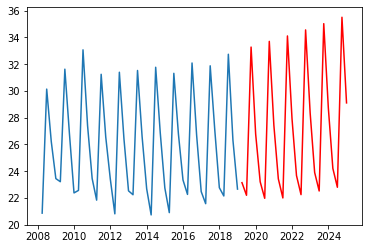

In [ ]:
plt.plot(range1 , raw_seq)
plt.plot(range2 , output , 'r')

In [ ]:
result = pd.DataFrame(output , columns = ['NSP'])

In [ ]:
result['Average Temperature'] = output

In [ ]:
result['Year'] = range2

In [ ]:
raw_seq2 = df['Relapse Male'] + df['Relapse Female']

In [ ]:
X2, y2 = split_sequence(raw_seq2, n_steps)

In [ ]:
X2 = X2.reshape((X2.shape[0], X2.shape[1], n_features))

In [ ]:
model.fit(X2, y2, epochs=1000, verbose=0)

In [ ]:
resArray2 = list(X2[-1])

In [ ]:
for i in range(0 , 24):
  abc = resArray2[i:i+8]
  x_input = array(abc).astype('float32')
  x_input = x_input.reshape((1, n_steps, n_features))
  resArray2.append(model.predict(x_input, verbose=0))


In [ ]:
output = array(resArray2[8:]).flatten()

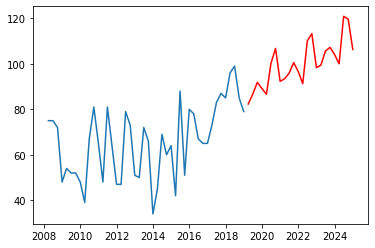

In [ ]:
plt.plot(range1 , raw_seq2)
plt.plot(range2 , output , 'r')

In [ ]:
result['Relapse Total'] = output

In [ ]:
raw_seq3 = df['NSN Male/NewClinDiag Male'] + df['NSN Female/NewClinDiag Female']

In [ ]:
X3, y3 = split_sequence(raw_seq3, n_steps)

In [ ]:
X3 = X3.reshape((X3.shape[0], X3.shape[1], n_features))

In [ ]:
model.fit(X3, y3, epochs=1000, verbose=0)

In [ ]:
resArray3 = list(X3[-1])

In [ ]:
for i in range(0 , 24):
  abc = resArray3[i:i+8]
  x_input = array(abc).astype('float32')
  x_input = x_input.reshape((1, n_steps, n_features))
  resArray3.append(model.predict(x_input, verbose=0))


In [ ]:
output = array(resArray3[8:]).flatten()

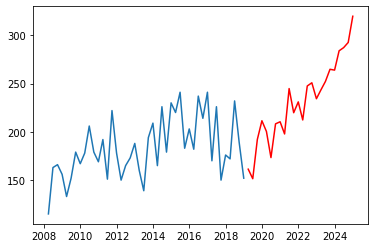

In [ ]:
plt.plot(range1 , raw_seq3)
plt.plot(range2 , output , 'r')

In [ ]:
result['NSN Total'] = output

In [ ]:
result['State'] = 'Madhya Pradesh'

In [ ]:
result['District'] = 'Ujjain'

In [ ]:
result = result[['State' , 'District' , 'Year' , 'Rainfall' , 'Relative Humidity' , 'Average Temperature' , 'NSP' , 'Relapse Total' , 'NSN Total']]

In [ ]:
result.to_csv('UjjainPred.csv' , index = False)

In [ ]:
result

,NSP,Year,Rainfall,Relative Humidity,Average Temperature
0,384.874176,2019-03-31,13.286482,64.152527,21.252214
1,395.872589,2019-06-30,39.747833,34.333740,19.608793
2,452.609222,2019-09-30,134.148087,22.644094,32.788448
3,476.930481,2019-12-31,964.951294,80.038467,28.468248
4,442.740295,2020-03-31,33.192051,57.581493,21.257965
5,437.703979,2020-06-30,46.507729,37.740322,19.289560
6,459.177887,2020-09-30,156.529449,25.662203,33.102337
7,475.568146,2020-12-31,1225.593140,81.912079,28.561802
8,442.911591,2021-03-31,8.795707,61.314632,20.922325
9,446.522064,2021-06-30,30.184031,37.472862,18.906992
